In [1]:
from pyspark import SparkContext
from pyspark.sql import Row, SQLContext, SparkSession
import os

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sc = SparkContext()

22/05/09 07:57:06 WARN Utils: Your hostname, Nathans-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.1.2 instead (on interface en0)
22/05/09 07:57:06 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/09 07:57:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [4]:
spark = SparkSession(sc)

### Requirements:

### Solutions

#### Q1

In [5]:
file_path = os.path.join('..', 'src-data', 'Fifa2018_dataset.csv')
fifa_df = spark.read.option('Header', True).csv(file_path, inferSchema = True)

#### Q2

In [6]:
fifa_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [7]:
for row in fifa_df.head(2):
    print(row)
    print('\n')

Row(_c0=0, Name='Cristiano Ronaldo', Age=32, Photo='https://cdn.sofifa.org/48/18/players/20801.png', Nationality='Portugal', Flag='https://cdn.sofifa.org/flags/38.png', Overall=94, Potential=94, Club='Real Madrid CF', Club Logo='https://cdn.sofifa.org/24/18/teams/243.png', Value='€95.5M', Wage='€565K', Special=2228, Acceleration='89', Aggression='63', Agility='89', Balance='63', Ball control='93', Composure='95', Crossing='85', Curve='81', Dribbling='91', Finishing='94', Free kick accuracy='76', GK diving='7', GK handling='11', GK kicking='15', GK positioning='14', GK reflexes='11', Heading accuracy='88', Interceptions='29', Jumping='95', Long passing='77', Long shots='92', Marking='22', Penalties='85', Positioning='95', Reactions='96', Short passing='83', Shot power='94', Sliding tackle='23', Sprint speed='91', Stamina='92', Standing tackle='31', Strength='80', Vision='85', Volleys='88', CAM=89.0, CB=53.0, CDM=62.0, CF=91.0, CM=82.0, ID=20801, LAM=89.0, LB=61.0, LCB=53.0, LCM=82.0, LD

22/05/09 07:57:11 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
22/05/09 07:57:11 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , Name, Age, Photo, Nationality, Flag, Overall, Potential, Club, Club Logo, Value, Wage, Special, Acceleration, Aggression, Agility, Balance, Ball control, Composure, Crossing, Curve, Dribbling, Finishing, Free kick accuracy, GK diving, GK handling, GK kicking, GK positioning, GK reflexes, Heading accuracy, Interceptions, Jumping, Long passing, Long shots, Marking, Penalties, Positioning, Reactions, Short passing, Shot power, Sliding tackle, Sprint speed, Stamina, Standing tackle, Strength, Vision, Volleys, CAM, CB, CDM, CF, CM, ID, LAM, LB, LCB, LCM, LDM, LF, LM, LS, LW, LWB, Preferred Positions, RAM, RB, RCB, RCM, RDM, RF, RM, RS, RW, RWB, ST
 Schema: _c0, Name, Age, Photo, Nationality, Flag, Overall, Potential, Clu

In [8]:
print(f'Number of row: {fifa_df.count()}')

Number of row: 17981


#### Q3

In [9]:
fifa_df.createOrReplaceTempView('fifa_table')

#### Q4

In [10]:
query = 'SELECT Age FROM fifa_table WHERE Nationality == "Germany" '
fifa_germany_age = spark.sql(query)

In [11]:
fifa_germany_age.show(3)

+---+
|Age|
+---+
| 31|
| 27|
| 28|
+---+
only showing top 3 rows



Generate statistics

In [12]:
fifa_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293752|
|    min|               16|
|    max|               36|
+-------+-----------------+



#### Q5

Convert PySpark DataFrame to Pandas DataFrame

In [13]:
fifa_germany_age_pd = fifa_germany_age.toPandas()

In [14]:
fifa_germany_age_pd.head()

,Age
0,31
1,27
2,28
3,28
4,28


In [15]:
import matplotlib.pyplot as plt

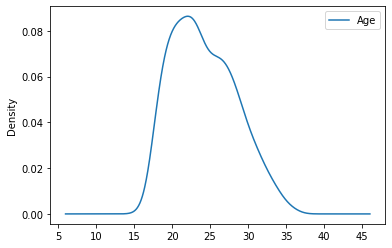

In [16]:
fifa_germany_age_pd.plot(kind = 'density')
plt.show()

#### Q6 

In [17]:
fifa_df.groupBy('Age').count().show(5)

+---+-----+
|Age|count|
+---+-----+
| 31|  671|
| 34|  272|
| 28| 1051|
| 26| 1202|
| 27| 1152|
+---+-----+
only showing top 5 rows



In [18]:
fifa_df.groupBy('Nationality').avg('Age').show(5)

+-----------+------------------+
|Nationality|          avg(Age)|
+-----------+------------------+
|       Chad|              25.0|
|     Russia| 25.23202614379085|
|   Paraguay| 26.10144927536232|
|    Senegal|25.046511627906977|
|     Sweden|25.119565217391305|
+-----------+------------------+
only showing top 5 rows



#### Q7

If you use `agg(colution_name: funtion)`

In [19]:
fifa_df.groupBy('Nationality').agg({'Age': 'min',
                                    'Age': 'max',
                                    'Strength': 'min',
                                    'Strength': 'max'}).show(5)

+-----------------+--------+-------------+
|      Nationality|max(Age)|max(Strength)|
+-----------------+--------+-------------+
|      Afghanistan|      27|           58|
|          Albania|      33|           79|
|          Algeria|      34|           90|
|           Angola|      34|           87|
|Antigua & Barbuda|      26|           67|
+-----------------+--------+-------------+
only showing top 5 rows



If you use `agg(function(colution))`

In [20]:
from pyspark.sql import functions as F

In [21]:
fifa_df.groupBy('Nationality').agg(F.min('Age'),
                                   F.max('Age'),
                                   F.min('Strength'),
                                   F.max('Strength')).show(5)

+-----------------+--------+--------+-------------+-------------+
|      Nationality|min(Age)|max(Age)|min(Strength)|max(Strength)|
+-----------------+--------+--------+-------------+-------------+
|      Afghanistan|      19|      27|           40|           58|
|          Albania|      18|      33|           32|           79|
|          Algeria|      17|      34|           39|           90|
|           Angola|      20|      34|           56|           87|
|Antigua & Barbuda|      20|      26|           47|           67|
+-----------------+--------+--------+-------------+-------------+
only showing top 5 rows



#### Q8

DataFrame API

In [22]:
fifa_df.select('club').distinct().show(5)

+------------------+
|              club|
+------------------+
|           Palermo|
|       Yeovil Town|
|1. FC Union Berlin|
|Santiago Wanderers|
|             Carpi|
+------------------+
only showing top 5 rows



SQL

In [23]:
query = 'SELECT DISTINCT club FROM fifa_table'
spark.sql(query).show(5)

+------------------+
|              club|
+------------------+
|           Palermo|
|       Yeovil Town|
|1. FC Union Berlin|
|Santiago Wanderers|
|             Carpi|
+------------------+
only showing top 5 rows



#### Q9

In [24]:
fifa_df_desc = fifa_df.orderBy(fifa_df.Age.desc())

In [25]:
fifa_df_desc.select(['Name', 'Age', 'Strength']).show(5)

+-------------+---+--------+
|         Name|Age|Strength|
+-------------+---+--------+
|B. Richardson| 47|      47|
| E. El Hadary| 44|      73|
|     O. Pérez| 44|      66|
|     D. Coyne| 43|      76|
|    J. Walker| 43|      62|
+-------------+---+--------+
only showing top 5 rows



#### Q10

DataFrame API

In [26]:
fifa_df_name = fifa_df.where(fifa_df.Name.contains('Cristiano'))
fifa_df_name.count()

3

In [27]:
fifa_df_name.select('Name').show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+



SQL

In [28]:
query = 'SELECT Name FROM fifa_table WHERE Name LIKE "%Cristiano%" '
spark.sql(query).show()

+-----------------+
|             Name|
+-----------------+
|Cristiano Ronaldo|
|        Cristiano|
|        Cristiano|
+-----------------+

